In [1]:
from ezonnx.ops.visualize import visualize_images

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Depth Estimation with DepthAnythingV2

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--onnx-community--depth-anything-v2-small/snapshots/02504fff2a0de682e3162e5e89bdeab034e1b96d/onnx/model_fp16.onnx


/Users/satoshi/python/ezonnx/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


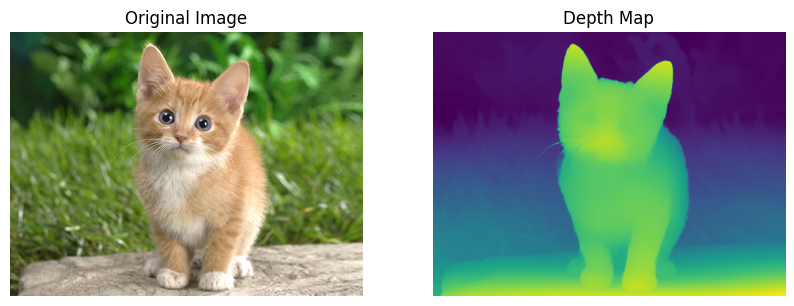

In [2]:
from ezonnx import DepthAnythingV2
depther = DepthAnythingV2(backbone="small",quantize="fp16")
res = depther("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Depth Map"],
                    [res.original_img[...,::-1],res.processed_img])


### Background removal with RMBG1.4

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--briaai--RMBG-1.4/snapshots/2ceba5a5efaec153162aedea169f76caf9b46cf8/onnx/model_quantized.onnx


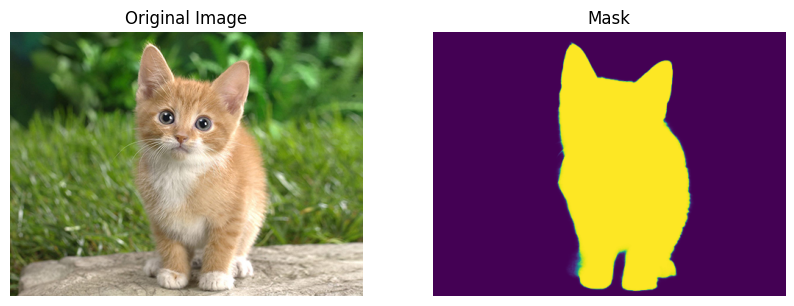

In [3]:
from ezonnx import RMBG14
rmbg = RMBG14(quantize="quantized")
res = rmbg("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask"],
                    [res.original_img[...,::-1],res.processed_img])

### Image inpainting with LaMa

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--Carve--LaMa-ONNX/snapshots/c3c0c9e468934d62e79c329e35d82dd09ff8c444/lama_fp32.onnx


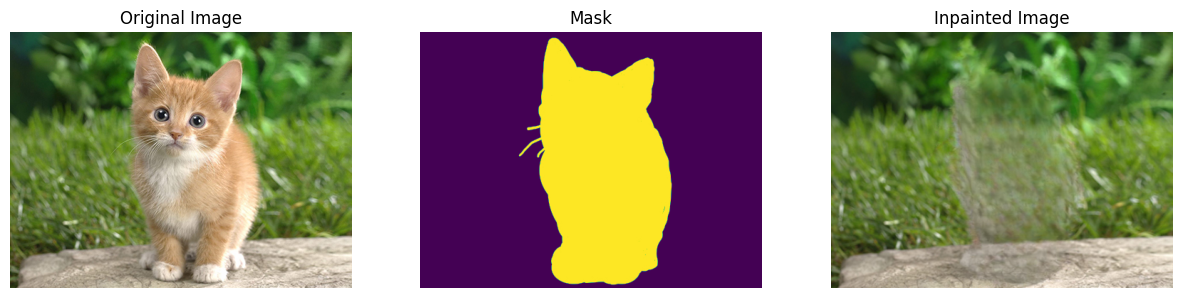

In [4]:
from ezonnx import LaMa
lama = LaMa()
result = lama("images/cat.jpg","images/cat_mask.png")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask","Inpainted Image"],
                    [result.original_img[...,::-1],result.mask,result.processed_img])

Optical flow estimation with NeuFlowV2

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


ONNX path: /Users/satoshi/.cache/huggingface/hub/models--bukuroo--NeuFlowV2-ONNX/snapshots/6b92f2df04f98b1f5c5e010982ada9af60b052fc/neuflow_mixed.onnx


/Users/satoshi/python/ezonnx/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


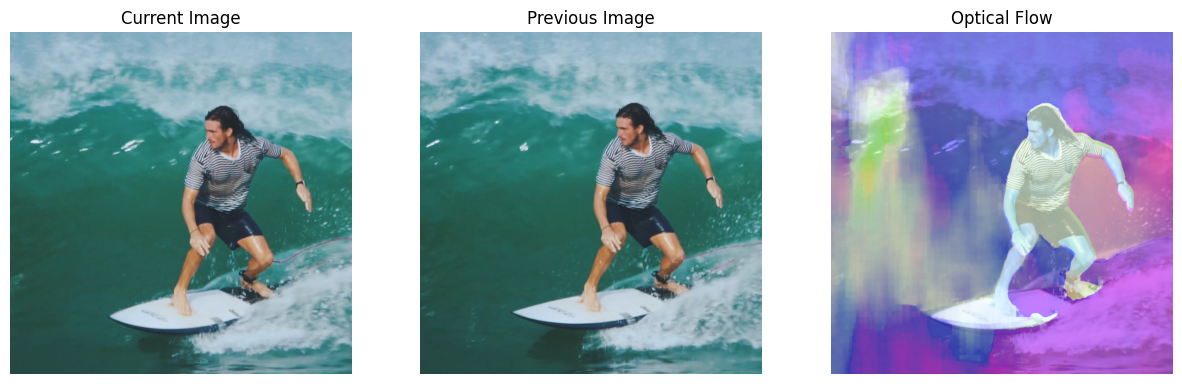

In [1]:
from ezonnx import NeuFlowV2, visualize_images
neuflow = NeuFlowV2("mixed")
output = neuflow("images/surf_next.jpg","images/surf.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Current Image","Previous Image","Optical Flow"],
                    [output.original_img[...,::-1],
                    output.previous_img[...,::-1],output.visualized_img])

In [2]:
output.flow

array([[[ 9.939123  ,  4.1368766 ],
        [ 9.917077  ,  4.1066456 ],
        [ 9.872986  ,  4.046183  ],
        ...,
        [39.43274   ,  0.71927017],
        [39.379684  ,  0.68394816],
        [39.35316   ,  0.6662871 ]],

       [[ 9.939123  ,  4.1368766 ],
        [ 9.917077  ,  4.1066456 ],
        [ 9.872986  ,  4.046183  ],
        ...,
        [39.43274   ,  0.71927017],
        [39.379684  ,  0.68394816],
        [39.35316   ,  0.6662871 ]],

       [[ 9.923858  ,  4.148373  ],
        [ 9.908361  ,  4.1198955 ],
        [ 9.877369  ,  4.0629406 ],
        ...,
        [39.439278  ,  0.72652334],
        [39.395683  ,  0.69555837],
        [39.37389   ,  0.6800759 ]],

       ...,

       [[20.682375  ,  4.8916783 ],
        [20.69106   ,  4.8846374 ],
        [20.708427  ,  4.8705564 ],
        ...,
        [53.675034  , -7.5326395 ],
        [53.785786  , -7.5515184 ],
        [53.84116   , -7.5609565 ]],

       [[20.653732  ,  4.8895965 ],
        [20.66256   ,  4.88